<a href="https://colab.research.google.com/github/nupursjsu/Advanced-Deep-Learning/blob/master/Assignment_2/Part_B_Linear_classifier_using_lowlevel_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a linear classifier using low level tensorflow code and GradientTape

## Introduction to GradientTape

With the help of **tf.GradientTape** we can track TensorFlow computations and calculate gradients with respect to some given variables.

Following is an example :

In [ ]:
import tensorflow as tf

x = tf.constant(5.0)
with tf.GradientTape() as tape:
    tape.watch(x)
    y = x**3

print(tape.gradient(y, x).numpy()) # -> 75.0

75.0


By default, GradientTape doesn’t track constants, so we must instruct it to with: tape.watch(variable). After that we can perform computations on the watched variable.

## Linear Classifier using GradientTape

Now when we know about the GradientTape let's build a linear classifier which we will use to classify the positive and negative numbers.

### 1.Generating dataset having positive and negative numbers

In [ ]:
#Importing necessary libraries
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#Generating 10000 samples each for postive and negative data
num_samples = 10000
negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5], [0.5, 1]], size=num_samples)
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5], [0.5, 1]], size=num_samples)

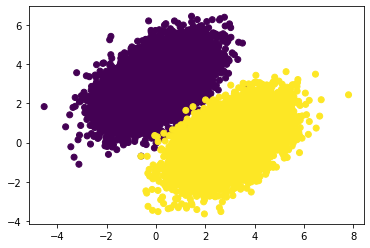

In [ ]:
#Plotting the postive and negative samples
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
labels = np.vstack((np.zeros((num_samples, 1), dtype='float32'),
                    np.ones((num_samples, 1), dtype='float32')))

plt.scatter(features[:, 0], features[:, 1], c=labels[:, 0])

###2.Building a linear classifier

For ease of demonstration we will use only low level tensorflow code with GradientTape to compute gradients.

In [ ]:
input_dim = 2
output_dim = 1
learning_rate = 0.01

# This is our weight matrix
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
# This is our bias vector
b = tf.Variable(tf.zeros(shape=(output_dim,)))

def compute_predictions(features):
  return tf.matmul(features, w) + b

def compute_loss(labels, predictions):
  return tf.reduce_mean(tf.square(labels - predictions))

def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x)
    loss = compute_loss(y, predictions)
    # Note that `tape.gradient` works with a list as well (w, b).
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

###3.Training our linear classifier

Here we are shuffling the data and training our linear classifier by iterating over batch-by-batch

In [ ]:
# Shuffle the data.
indices = np.random.permutation(len(features))
features = features[indices]
labels = labels[indices]

# Create a tf.data.Dataset object for easy batched iteration
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

for epoch in range(10):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 0.0983
Epoch 1: last batch loss = 0.0360
Epoch 2: last batch loss = 0.0465
Epoch 3: last batch loss = 0.0259
Epoch 4: last batch loss = 0.0308
Epoch 5: last batch loss = 0.0116
Epoch 6: last batch loss = 0.0261
Epoch 7: last batch loss = 0.0276
Epoch 8: last batch loss = 0.0254
Epoch 9: last batch loss = 0.0175


###4.Making predictions

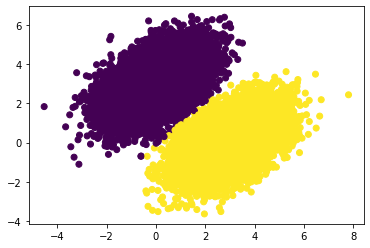

In [ ]:
predictions = compute_predictions(features)
plt.scatter(features[:, 0], features[:, 1], c=predictions[:, 0] > 0.5)

Above is the graph showing how our linear classifier model performed in classifying positive and negative numbers.